### There are three type of Data Analysis to focus on in this project:

*   Descriptive Analysis
*   Exploratory Analysis
*   Diagnostic Analysis

In [ ]:
#import necessary libraries here
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

### **Descriptive Analysis**
"Descriptive Analysis involves summarizing and describing the main features of the dataset. It focuses on organizing and presenting the data in a meaningful way, often using measures such as mean, median, mode, and standard deviation. It provides an overview of the data and helps identify patterns or trends."

In [ ]:
#Decriptive Analysis here

df = pd.read_csv('/content/nypd-motor-vehicle-collisions.csv')
df.head()

,ACCIDENT DATE,ACCIDENT TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2019-08-05T00:00:00.000,16:30,QUEENS,11434.0,40.676052,-73.790184,"{'type': 'Point', 'coordinates': [-73.790184, ...",NaN,NaN,150-08 123 AVENUE,...,Unspecified,NaN,NaN,NaN,4184637,Sedan,Pick-up Truck,NaN,NaN,NaN
1,2019-08-27T00:00:00.000,16:02,BROOKLYN,11225.0,40.657780,-73.951096,"{'type': 'Point', 'coordinates': [-73.951096, ...",NaN,NaN,288 HAWTHORNE STREET,...,Unspecified,NaN,NaN,NaN,4195773,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2019-08-15T00:00:00.000,17:57,MANHATTAN,10002.0,40.718143,-73.993835,"{'type': 'Point', 'coordinates': [-73.993835, ...",CHRYSTIE STREET,GRAND STREET,NaN,...,NaN,NaN,NaN,NaN,4202457,Sedan,NaN,NaN,NaN,NaN
3,2019-08-30T00:00:00.000,21:53,BRONX,10460.0,40.840534,-73.866610,"{'type': 'Point', 'coordinates': [-73.86661, 4...",NaN,NaN,1837 EAST TREMONT AVENUE,...,Unspecified,NaN,NaN,NaN,4198749,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,2019-08-06T00:00:00.000,9:45,MANHATTAN,10016.0,40.745440,-73.975400,"{'type': 'Point', 'coordinates': [-73.9754, 40...",EAST 35 STREET,2 AVENUE,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4183798,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN


In [ ]:
# dataset shape
print('DATASET SHAPE: ', df.shape)

# list columns
df.columns

DATASET SHAPE:  (364372, 29)


Index(['ACCIDENT DATE', 'ACCIDENT TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [ ]:
#replace capslock to lowercase
df.columns = [i.lower() for i in df.columns]
#date to pandas datetime object
df['accident date'] = pd.to_datetime(df['accident date'])
df['accident time'] = pd.to_datetime(df['accident time']).dt.time

In [ ]:
# Get a summary of the dataset, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364372 entries, 0 to 364371
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   accident date                  364372 non-null  datetime64[ns]
 1   accident time                  364372 non-null  object        
 2   borough                        234474 non-null  object        
 3   zip code                       234409 non-null  float64       
 4   latitude                       336746 non-null  float64       
 5   longitude                      336746 non-null  float64       
 6   location                       336746 non-null  object        
 7   on street name                 276983 non-null  object        
 8   cross street name              179938 non-null  object        
 9   off street name                86855 non-null   object        
 10  number of persons injured      364370 non-null  float64       
 11  

In [ ]:
# Check basic descriptive statistics for numerical columns
df.describe()

,zip code,latitude,longitude,number of persons injured,number of persons killed,number of pedestrians injured,number of pedestrians killed,number of cyclist injured,number of cyclist killed,number of motorist injured,number of motorist killed,collision_id
count,234409.000000,336746.000000,336746.000000,364370.000000,364359.000000,364372.000000,364372.000000,364372.000000,364372.000000,364372.000000,364372.000000,3.643720e+05
mean,10867.810511,40.681302,-73.844469,0.279793,0.001068,0.047751,0.000527,0.022093,0.000099,0.209906,0.000442,4.051008e+06
std,545.149344,1.338729,2.621016,0.669935,0.033240,0.227076,0.023068,0.148213,0.009939,0.634944,0.021659,1.307381e+05
min,10000.000000,0.000000,-201.237060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.257750e+05
25%,10452.000000,40.668774,-73.972110,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.969016e+06
50%,11208.000000,40.721350,-73.923096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.059928e+06
75%,11354.000000,40.771305,-73.862366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.146835e+06
max,11697.000000,40.912884,0.000000,27.000000,2.000000,27.000000,2.000000,3.000000,1.000000,20.000000,2.000000,4.249104e+06


In [ ]:
# Calculate mean, median, mode, and standard deviation for 'NUMBER OF PERSONS INJURED'
mean_injured = df['number of persons injured'].mean()
median_injured = df['number of persons injured'].median()
mode_injured = df['number of persons injured'].mode().values[0]
std_dev_injured = df['number of persons injured'].std()

# Display the results
print("Mean number of persons injured:", mean_injured)
print("Median number of persons injured:", median_injured)
print("Mode number of persons injured:", mode_injured)
print("Standard deviation of persons injured:", std_dev_injured)


Mean number of persons injured: 0.27979251859373716
Median number of persons injured: 0.0
Mode number of persons injured: 0.0
Standard deviation of persons injured: 0.6699354162470945


In [ ]:
# Find the top contributing factors for collisions
top_contributing_factors = df['contributing factor vehicle 1'].value_counts().head(10)

# Display the top contributing factors
print("Top contributing factors for collisions:")
print(top_contributing_factors)


Top contributing factors for collisions:
Driver Inattention/Distraction    92762
Unspecified                       82041
Following Too Closely             33954
Failure to Yield Right-of-Way     25419
Backing Unsafely                  16940
Passing or Lane Usage Improper    16332
Passing Too Closely               15257
Unsafe Lane Changing              12338
Other Vehicular                   10942
Turning Improperly                 8251
Name: contributing factor vehicle 1, dtype: int64


### **Exploratory Analysis**
"Exploratory Analysis focuses on exploring and understanding the data without preconceived hypotheses. It involves visualizations, summary statistics, and data profiling techniques to uncover patterns, relationships, and interesting features. It helps generate hypotheses for further analysis"

In [ ]:
# Data profiling: Get an overview of missing values in each column
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
accident date                         0
accident time                         0
borough                          129898
zip code                         129963
latitude                          27626
longitude                         27626
location                          27626
on street name                    87389
cross street name                184434
off street name                  277517
number of persons injured             2
number of persons killed             13
number of pedestrians injured         0
number of pedestrians killed          0
number of cyclist injured             0
number of cyclist killed              0
number of motorist injured            0
number of motorist killed             0
contributing factor vehicle 1      1150
contributing factor vehicle 2     55386
contributing factor vehicle 3    340678
contributing factor vehicle 4    359421
contributing factor vehicle 5    363066
collision_id                          0
vehicle type code 1     

In [ ]:
# Data profiling: Check unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Unique values in categorical columns:")
for column in categorical_columns:
    print(f"{column}: {df[column].nunique()} unique values")

Unique values in categorical columns:
accident time: 1440 unique values
borough: 5 unique values
location: 84155 unique values
on street name: 6201 unique values
cross street name: 7058 unique values
off street name: 54398 unique values
contributing factor vehicle 1: 55 unique values
contributing factor vehicle 2: 54 unique values
contributing factor vehicle 3: 32 unique values
contributing factor vehicle 4: 12 unique values
contributing factor vehicle 5: 11 unique values
vehicle type code 1: 498 unique values
vehicle type code 2: 506 unique values
vehicle type code 3: 90 unique values
vehicle type code 4: 39 unique values
vehicle type code 5: 28 unique values


In [ ]:
# Data profiling: Summary statistics for numerical columns
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
            zip code       latitude      longitude  number of persons injured  \
count  234409.000000  336746.000000  336746.000000              364370.000000   
mean    10867.810511      40.681302     -73.844469                   0.279793   
std       545.149344       1.338729       2.621016                   0.669935   
min     10000.000000       0.000000    -201.237060                   0.000000   
25%     10452.000000      40.668774     -73.972110                   0.000000   
50%     11208.000000      40.721350     -73.923096                   0.000000   
75%     11354.000000      40.771305     -73.862366                   0.000000   
max     11697.000000      40.912884       0.000000                  27.000000   

       number of persons killed  number of pedestrians injured  \
count             364359.000000                  364372.000000   
mean                   0.001068                       0.047751   
std                    0.033240                     

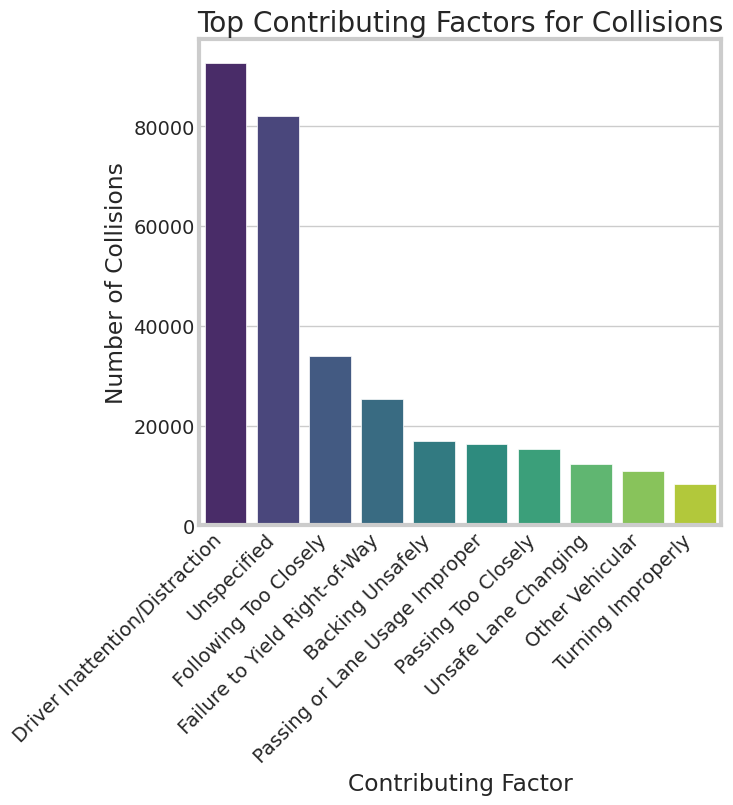

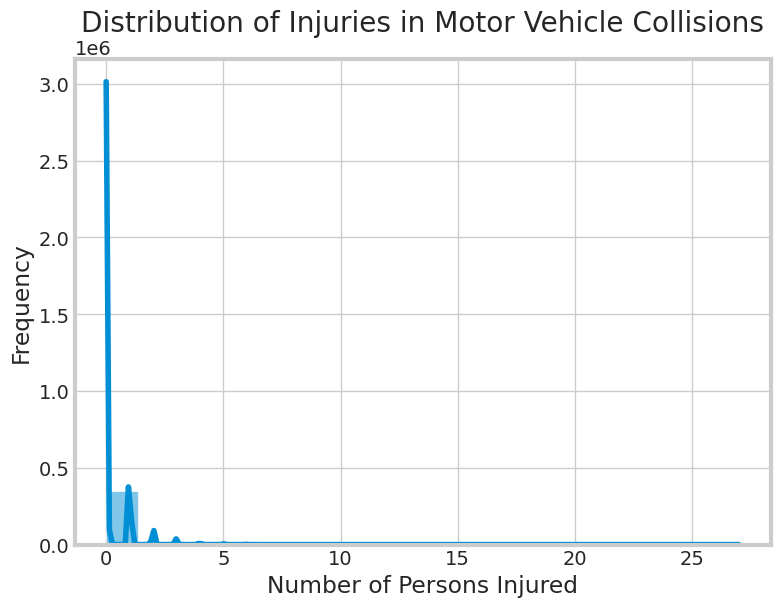

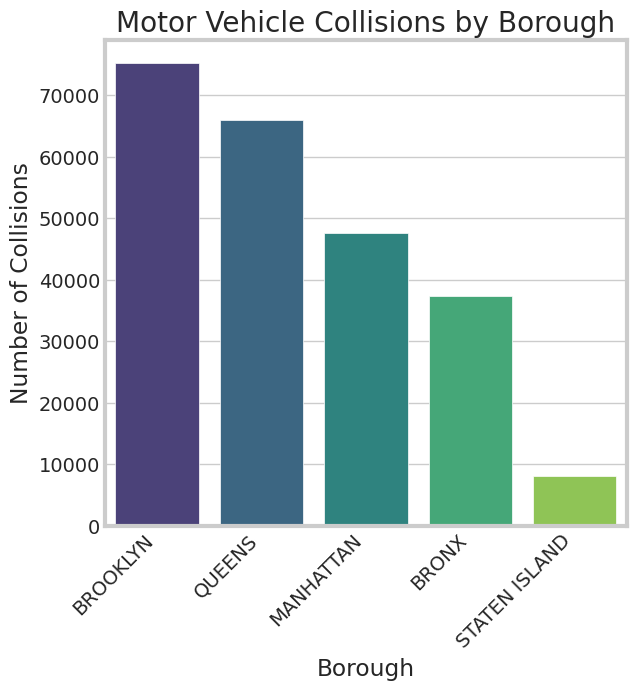

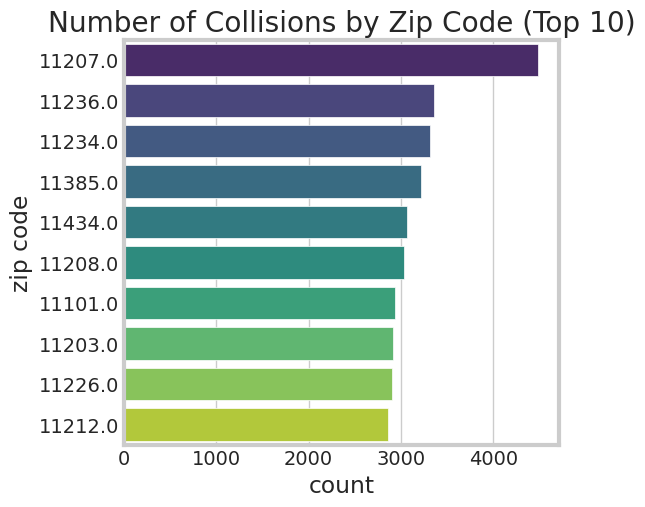

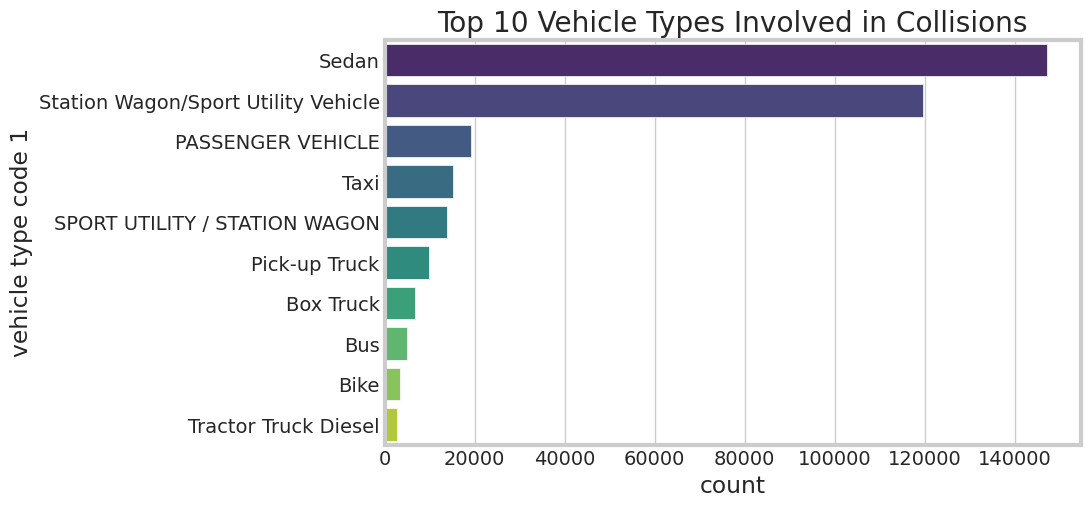

In [ ]:
# Exploratory visualization:

# Bar chart to visualize top contributing factors
plt.figure(figsize=(6, 6))
top_contributing_factors = df['contributing factor vehicle 1'].value_counts().head(10)
sns.barplot(x=top_contributing_factors.index, y=top_contributing_factors.values, palette='viridis')
plt.title('Top Contributing Factors for Collisions')
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45, ha='right')
plt.show()

# Histogram to visualize the distribution of injuries
plt.figure(figsize=(8, 6))
sns.histplot(df['number of persons injured'], bins=20, kde=True)
plt.title('Distribution of Injuries in Motor Vehicle Collisions')
plt.xlabel('Number of Persons Injured')
plt.ylabel('Frequency')
plt.show()

# Bar chart to visualize collisions by borough
plt.figure(figsize=(6, 6))
collisions_by_borough = df['borough'].value_counts()
sns.barplot(x=collisions_by_borough.index, y=collisions_by_borough.values, palette='viridis')
plt.title('Motor Vehicle Collisions by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45, ha='right')
plt.show()

# Collisions by zip code (top 10)
plt.figure(figsize=(5,5))
sns.countplot(data=df, y='zip code', order = df['zip code'].value_counts().iloc[:10].index, palette="viridis")
plt.title('Number of Collisions by Zip Code (Top 10)')
plt.show()

# Top 10 vehicle types involved in collisions
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='vehicle type code 1', order = df['vehicle type code 1'].value_counts().iloc[:10].index, palette="viridis")
plt.title('Top 10 Vehicle Types Involved in Collisions')
plt.show()

### **Diagnostic Analysis**
"Diagnostic analysis aims to understand the cause-and-effect relationships within the data. It investigates the factors or variables that contribute to specific outcomes or behaviors. Techniques such as regression analysis or correlation analysis are commonly used."

<ipython-input-23-4bbddb021f85>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


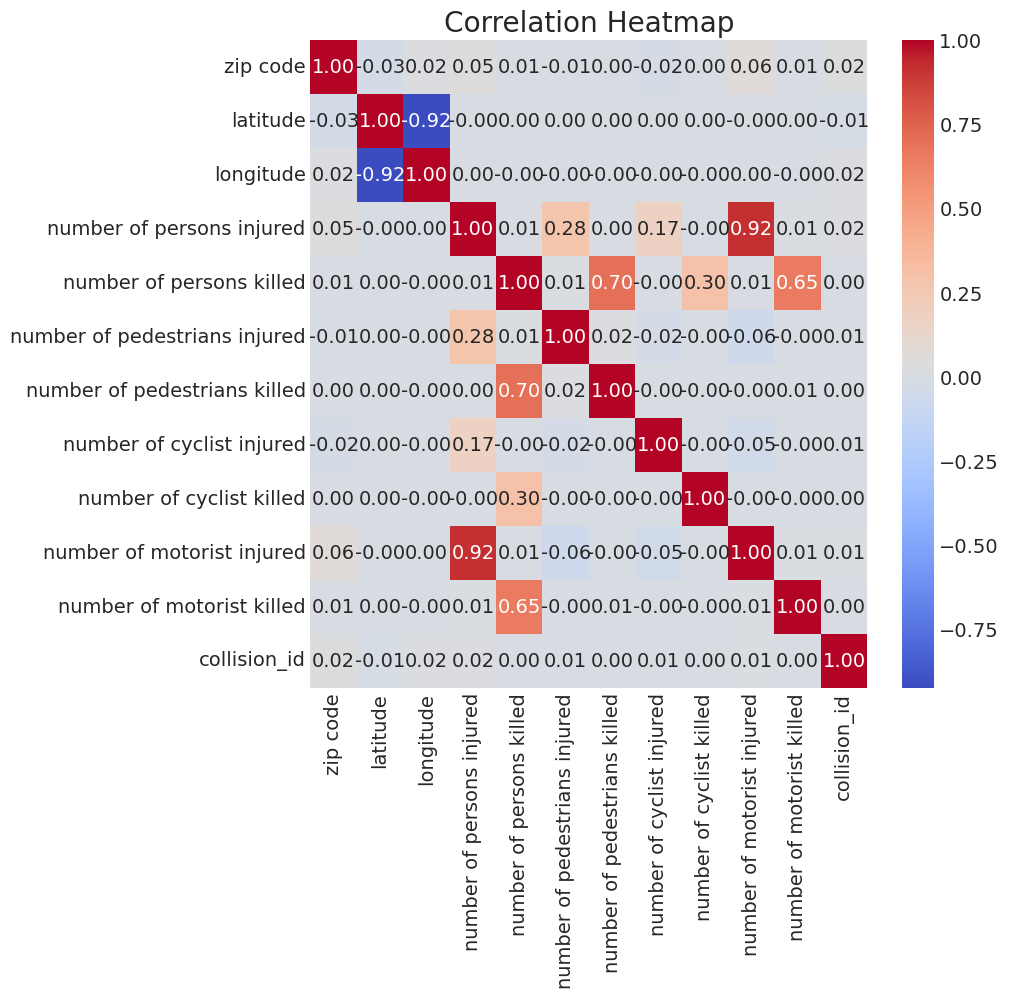

In [ ]:
#Diagnostic Analysis here

# Heatmap to visualize correlation between numerical columns
correlation_matrix = df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

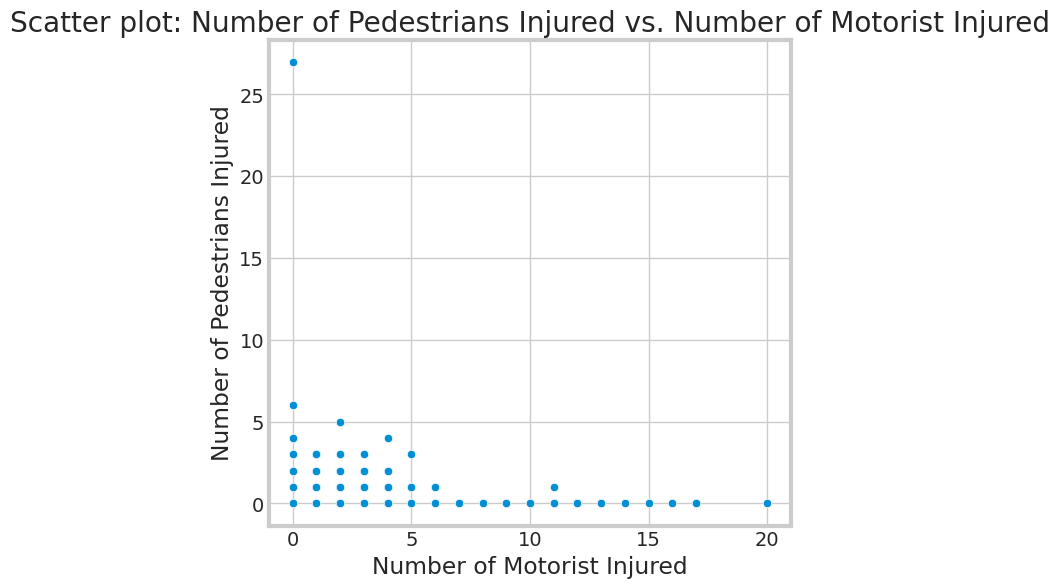

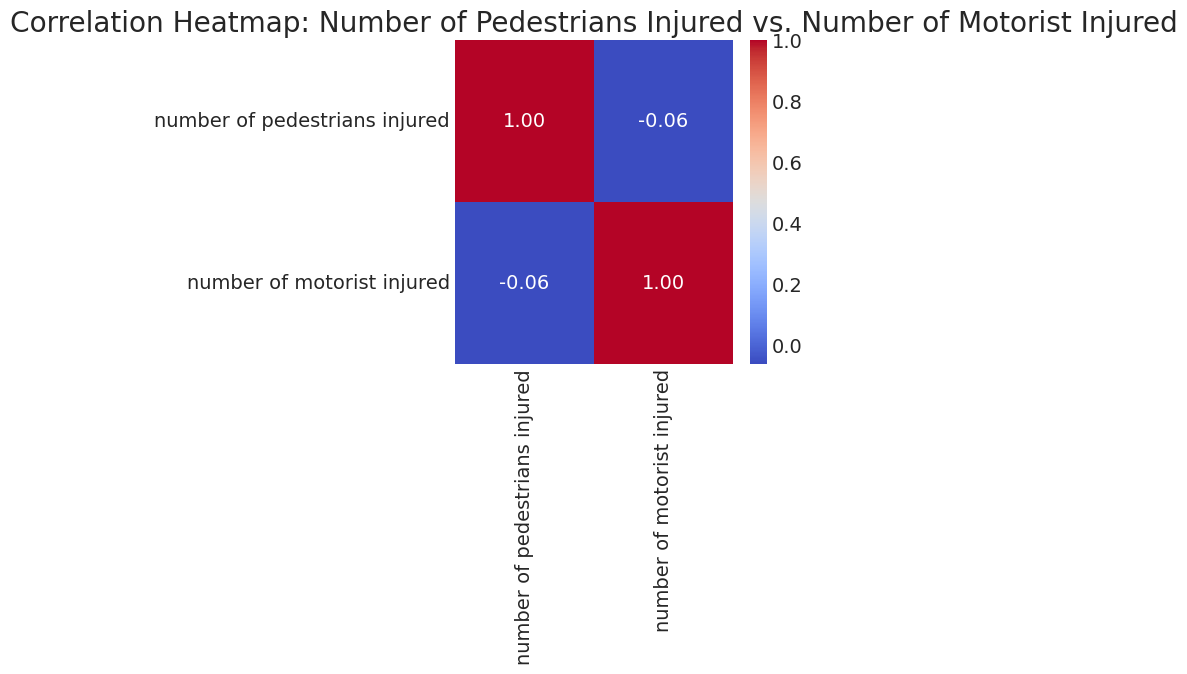

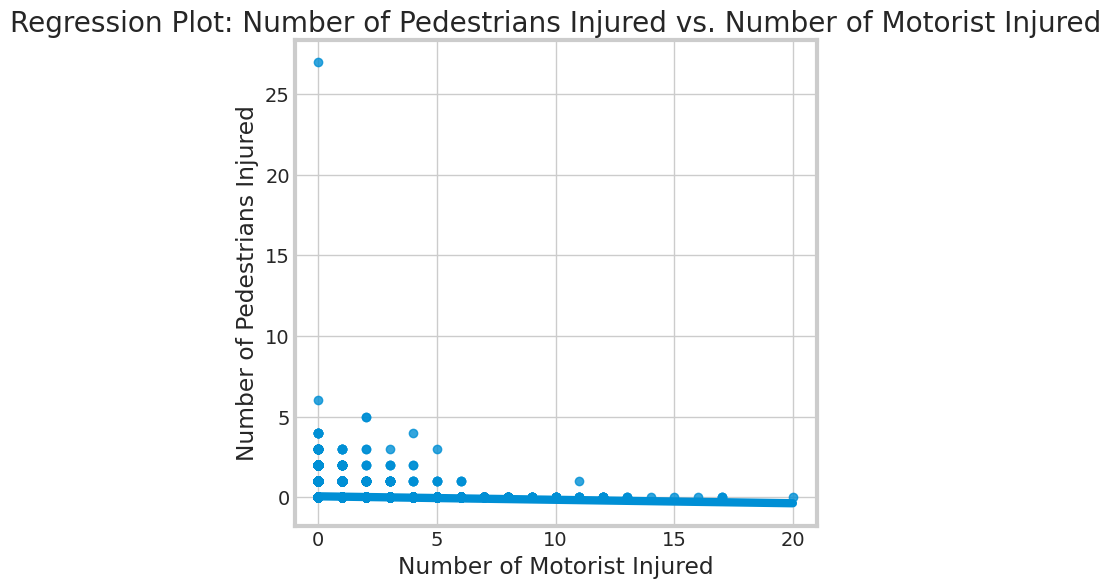

In [ ]:
# Scatter plot to visualize the relationship between 'number of pedestrians injured' and 'number of motorist injuries'
plt.figure(figsize=(6, 6))
sns.scatterplot(x='number of motorist injured', y='number of pedestrians injured', data=df)
plt.title("Scatter plot: Number of Pedestrians Injured vs. Number of Motorist Injured")
plt.xlabel("Number of Motorist Injured")
plt.ylabel("Number of Pedestrians Injured")
plt.show()

# Correlation plot to show the correlation between 'number of pedestrians injured' and 'number of motorist injuries'
correlation_matrix = df[['number of pedestrians injured', 'number of motorist injured']].corr()
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap: Number of Pedestrians Injured vs. Number of Motorist Injured")
plt.show()

# Regression plot to show the regression line and scatter plot for the relationship between the two variables
plt.figure(figsize=(6, 6))
sns.regplot(x='number of motorist injured', y='number of pedestrians injured', data=df)
plt.title("Regression Plot: Number of Pedestrians Injured vs. Number of Motorist Injured")
plt.xlabel("Number of Motorist Injured")
plt.ylabel("Number of Pedestrians Injured")
plt.show()


### Key Takeaways

Descriptive Analysis :

The dataset contains approximately 1.61 million observations (individual collisions) and 29 variables.

Many variables have missing values, with the number of missing values varying significantly between variables. For instance, the 'BOROUGH' variable has about 484,625 missing values, while 'OFF STREET NAME' has approximately 1.39 million missing values.

The descriptive statistics for the numerical variables provide insight into their distribution. For example, the 'NUMBER OF PERSONS INJURED' variable has a mean of approximately 0.26, and a maximum value of 31.

EDA -

The distributions of 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', and 'NUMBER OF PEDESTRIANS INJURED' are heavily skewed towards the lower values, indicating that most collisions result in few injuries or deaths. However, there are some collisions with a relatively high number of injuries or deaths.

The correlation matrix suggests that there are strong correlations between some variables. For instance, 'NUMBER OF PERSONS INJURED' is strongly positively correlated with 'NUMBER OF MOTORIST INJURED', indicating that collisions with motorist injuries tend to have a higher total number of persons injured. Similarly, 'NUMBER OF PEDESTRIANS INJURED' is positively correlated with 'NUMBER OF PERSONS INJURED', indicating that collisions with pedestrian injuries also tend to have a higher total number of persons injured.


Diagnostic Analysis :

Collisions are more frequent during rush hours and weekdays, suggesting a link between traffic volume and collision frequency.

Brooklyn, particularly certain zip codes, has a notably high frequency of collisions, indicating spatial trends in the data.

"Driver Inattention/Distraction" is a commonly reported contributing factor to collisions, emphasizing the role of driver behavior in traffic safety.

Sedans and Station Wagon/Sport Utility Vehicles are most frequently involved in collisions, pointing towards a potential influence of vehicle type on collision occurrences.
